## Loan Default Risk 

#### Introduction <br>
This is a machine learning exercise to determine which customers will be able to repay their loans given a number of factors
#### Contents
1.  Importing Libraries
2.  Importing Data
3.  Evaluating Data
4.  Summarizing Null Values
5.  Heatmap of Correalted Features
6.  Frequency Distribution of Features
7.  One Hot Encoding of Categorical Variables
8.  Decision Tree Classifier
9.  Cross_Val_Score




#### 1. Importing Libraries

In [1]:
#Importing data wrangling library
import pandas as pd

#Importing visulization libraries
from matplotlib import pyplot as plt
import seaborn as sns


#Importing Machine Learning Libraries(Preprocessing)
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Importing Machine Learning Libraries(Modelling And Evaluation) 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


#assigning a filepath to the dataset
filepath = "C:/Users/chara.geru/OneDrive - Avanade/DataScienceProject/HomeCreditModel/data/raw/new_df2.csv"

#### 2. Importing Data

Firstly we will import the data and run methods to help us understand the data.

In [2]:
df2 = pd.read_csv(filepath)

In [3]:
df2.head()

,Unnamed: 0,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,DAYS_ID_PUBLISH,CODE_GENDER,...,AMT_GOODS_PRICE,AMT_CREDIT,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,YEARS_BUILD_AVG,LIVINGAPARTMENTS_AVG,FLAG_WORK_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE
0,0,1,0.083037,0.262949,0.139376,-9461,-637,Secondary / secondary special,-2120,M,...,351000.0,406597.5,Business Entity Type 3,-1134.0,Working,0.6192,0.0202,0,0,1
1,1,0,0.311267,0.622246,NaN,-16765,-1188,Higher education,-291,F,...,1129500.0,1293502.5,School,-828.0,State servant,0.7960,0.0773,0,0,1
2,2,0,NaN,0.555912,0.729567,-19046,-225,Secondary / secondary special,-2531,M,...,135000.0,135000.0,Government,-815.0,Working,NaN,NaN,1,0,1
3,3,0,NaN,0.650442,NaN,-19005,-3039,Secondary / secondary special,-2437,F,...,297000.0,312682.5,Business Entity Type 3,-617.0,Working,NaN,NaN,0,0,1
4,4,0,NaN,0.322738,NaN,-19932,-3038,Secondary / secondary special,-3458,M,...,513000.0,513000.0,Religion,-1106.0,Working,NaN,NaN,0,0,1


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              307511 non-null  int64  
 1   TARGET                  307511 non-null  int64  
 2   EXT_SOURCE_1            134133 non-null  float64
 3   EXT_SOURCE_2            306851 non-null  float64
 4   EXT_SOURCE_3            246546 non-null  float64
 5   DAYS_BIRTH              307511 non-null  int64  
 6   DAYS_EMPLOYED           307511 non-null  int64  
 7   NAME_EDUCATION_TYPE     307511 non-null  object 
 8   DAYS_ID_PUBLISH         307511 non-null  int64  
 9   CODE_GENDER             307511 non-null  object 
 10  AMT_ANNUITY             307499 non-null  float64
 11  DAYS_REGISTRATION       307511 non-null  float64
 12  AMT_GOODS_PRICE         307233 non-null  float64
 13  AMT_CREDIT              307511 non-null  float64
 14  ORGANIZATION_TYPE   

In [5]:
df2.describe()

,Unnamed: 0,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,AMT_ANNUITY,DAYS_REGISTRATION,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,YEARS_BUILD_AVG,LIVINGAPARTMENTS_AVG,FLAG_WORK_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE
count,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,307511.000000,307511.000000,307511.000000,307499.000000,307511.000000,3.072330e+05,3.075110e+05,307510.000000,103023.000000,97312.000000,307511.000000,307511.000000,307511.000000
mean,153755.000000,0.080729,0.502130,5.143927e-01,0.510853,-16036.995067,63815.045904,-2994.202373,27108.573909,-4986.120328,5.383962e+05,5.990260e+05,-962.858788,0.752471,0.100775,0.199368,0.056720,0.998133
std,88770.923652,0.272419,0.211062,1.910602e-01,0.194844,4363.988632,141275.766519,1509.450419,14493.737315,3522.886321,3.694465e+05,4.024908e+05,826.808487,0.113280,0.092576,0.399526,0.231307,0.043164
min,0.000000,0.000000,0.014568,8.173617e-08,0.000527,-25229.000000,-17912.000000,-7197.000000,1615.500000,-24672.000000,4.050000e+04,4.500000e+04,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76877.500000,0.000000,0.334007,3.924574e-01,0.370650,-19682.000000,-2760.000000,-4299.000000,16524.000000,-7479.500000,2.385000e+05,2.700000e+05,-1570.000000,0.687200,0.050400,0.000000,0.000000,1.000000
50%,153755.000000,0.000000,0.505998,5.659614e-01,0.535276,-15750.000000,-1213.000000,-3254.000000,24903.000000,-4504.000000,4.500000e+05,5.135310e+05,-757.000000,0.755200,0.075600,0.000000,0.000000,1.000000
75%,230632.500000,0.000000,0.675053,6.636171e-01,0.669057,-12413.000000,-289.000000,-1720.000000,34596.000000,-2010.000000,6.795000e+05,8.086500e+05,-274.000000,0.823200,0.121000,0.000000,0.000000,1.000000
max,307510.000000,1.000000,0.962693,8.549997e-01,0.896010,-7489.000000,365243.000000,0.000000,258025.500000,0.000000,4.050000e+06,4.050000e+06,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df2.dtypes #exploring datatypes in df2 dataframe

Unnamed: 0                  int64
TARGET                      int64
EXT_SOURCE_1              float64
EXT_SOURCE_2              float64
EXT_SOURCE_3              float64
DAYS_BIRTH                  int64
DAYS_EMPLOYED               int64
NAME_EDUCATION_TYPE        object
DAYS_ID_PUBLISH             int64
CODE_GENDER                object
AMT_ANNUITY               float64
DAYS_REGISTRATION         float64
AMT_GOODS_PRICE           float64
AMT_CREDIT                float64
ORGANIZATION_TYPE          object
DAYS_LAST_PHONE_CHANGE    float64
NAME_INCOME_TYPE           object
YEARS_BUILD_AVG           float64
LIVINGAPARTMENTS_AVG      float64
FLAG_WORK_PHONE             int64
FLAG_EMAIL                  int64
FLAG_CONT_MOBILE            int64
dtype: object

In [7]:
# "This function creates a table to summarize the null values"

def nulltable(df):
    """
    This function creates a table to summarize the null values
    """
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_df_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_df_data.head(20) 
    


In [8]:
nulltable(df2) #calling the function

,Total,Percent
LIVINGAPARTMENTS_AVG,210199,68.354953
YEARS_BUILD_AVG,204488,66.497784
EXT_SOURCE_1,173378,56.381073
EXT_SOURCE_3,60965,19.825307
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
DAYS_LAST_PHONE_CHANGE,1,0.000325
DAYS_ID_PUBLISH,0,0.000000
TARGET,0,0.000000


In [9]:
nulltable.__doc__

'\n    This function creates a table to summarize the null values\n    '

<AxesSubplot:>

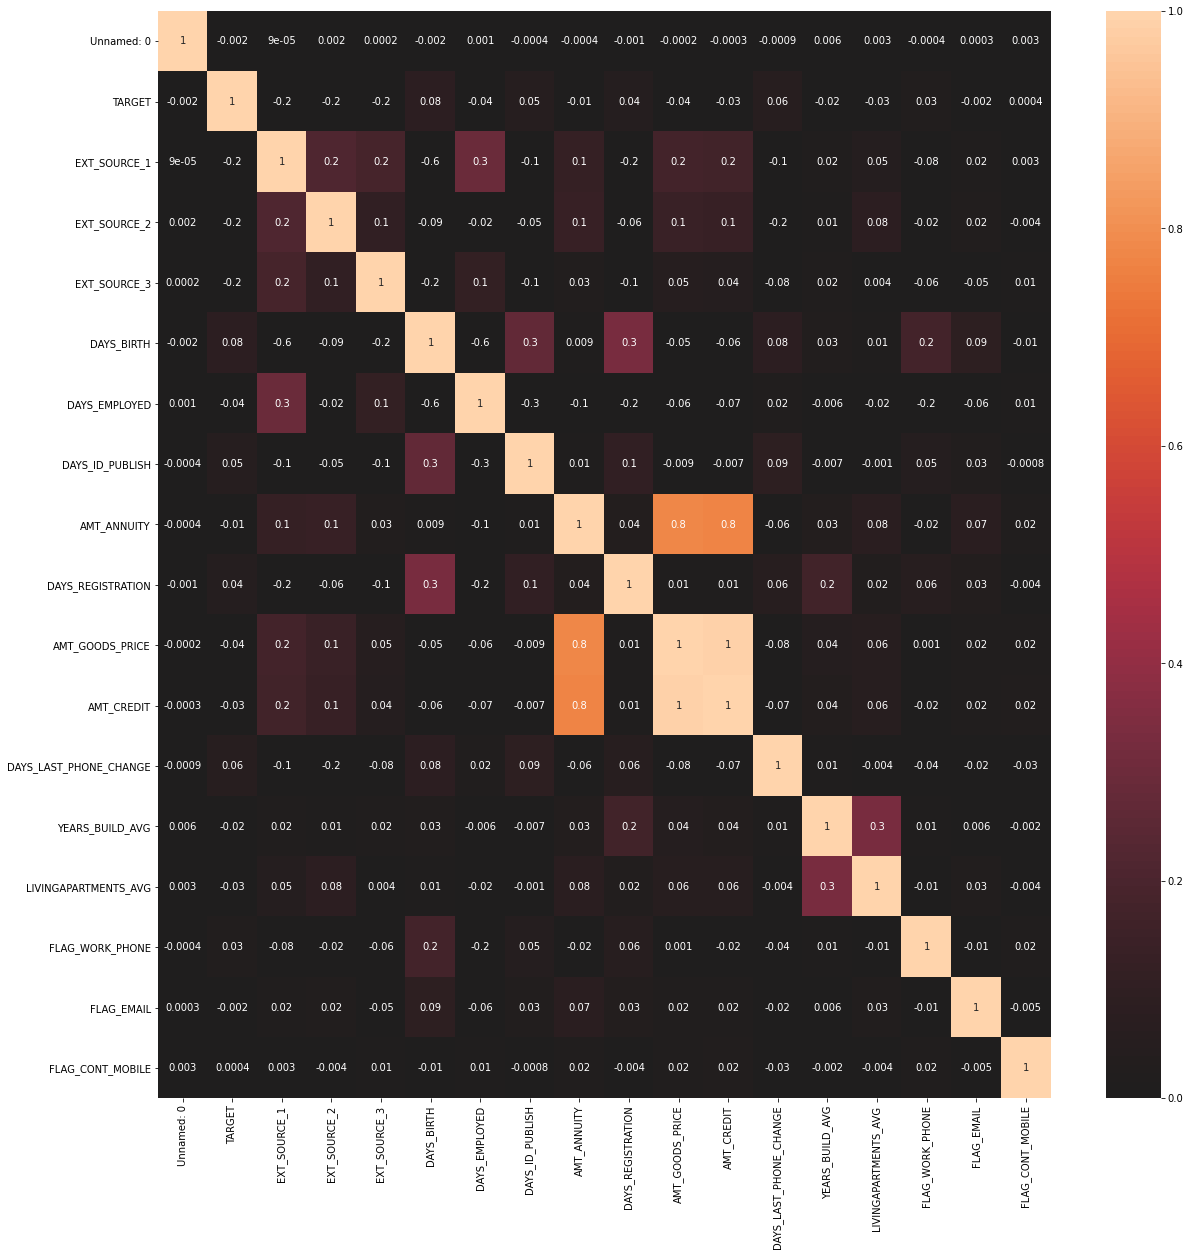

In [10]:
    
fig, ax = plt.subplots(figsize=(20,20)) 

sns.heatmap(df2.corr(),annot = True, fmt='.1g',vmin=0, vmax=1, center= 0,ax=ax)

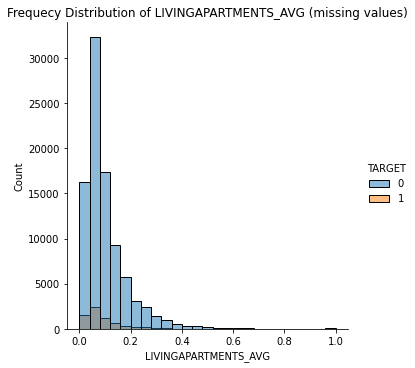

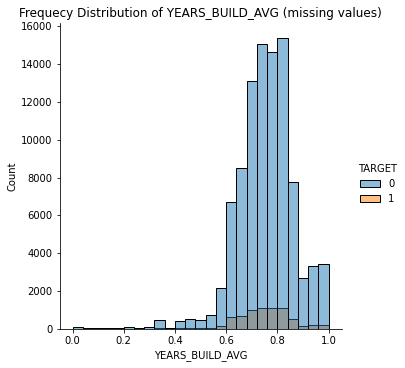

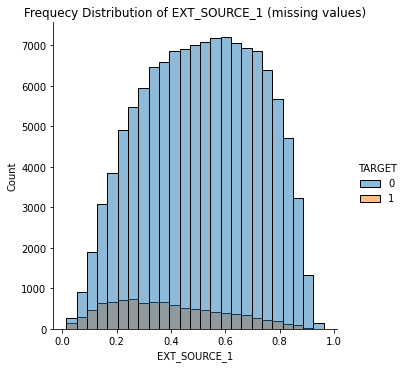

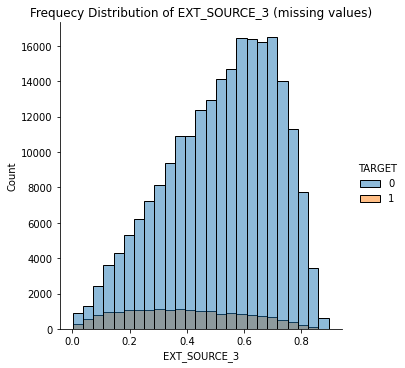

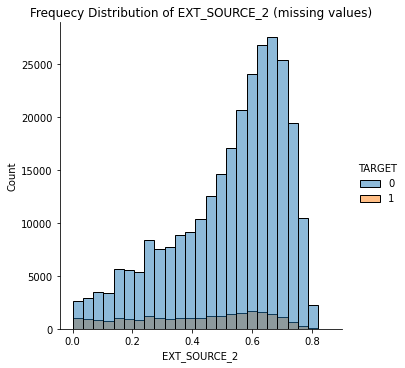

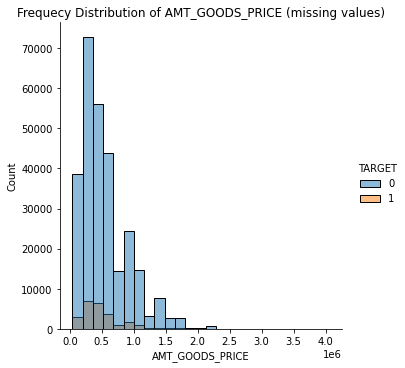

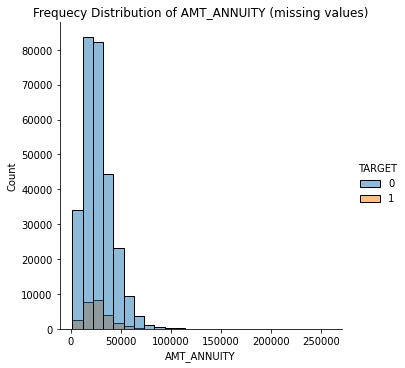

In [11]:

columns=["LIVINGAPARTMENTS_AVG", "YEARS_BUILD_AVG","EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2","AMT_GOODS_PRICE","AMT_ANNUITY"]

for col in columns:
    sns.displot(df2, x=col, hue="TARGET",bins=25)
    plt.title('Frequecy Distribution of '+ col + " (missing values)")
   

In [12]:
df2

,Unnamed: 0,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,NAME_EDUCATION_TYPE,DAYS_ID_PUBLISH,CODE_GENDER,...,AMT_GOODS_PRICE,AMT_CREDIT,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,YEARS_BUILD_AVG,LIVINGAPARTMENTS_AVG,FLAG_WORK_PHONE,FLAG_EMAIL,FLAG_CONT_MOBILE
0,0,1,0.083037,0.262949,0.139376,-9461,-637,Secondary / secondary special,-2120,M,...,351000.0,406597.5,Business Entity Type 3,-1134.0,Working,0.6192,0.0202,0,0,1
1,1,0,0.311267,0.622246,NaN,-16765,-1188,Higher education,-291,F,...,1129500.0,1293502.5,School,-828.0,State servant,0.7960,0.0773,0,0,1
2,2,0,NaN,0.555912,0.729567,-19046,-225,Secondary / secondary special,-2531,M,...,135000.0,135000.0,Government,-815.0,Working,NaN,NaN,1,0,1
3,3,0,NaN,0.650442,NaN,-19005,-3039,Secondary / secondary special,-2437,F,...,297000.0,312682.5,Business Entity Type 3,-617.0,Working,NaN,NaN,0,0,1
4,4,0,NaN,0.322738,NaN,-19932,-3038,Secondary / secondary special,-3458,M,...,513000.0,513000.0,Religion,-1106.0,Working,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,0.145570,0.681632,NaN,-9327,-236,Secondary / secondary special,-1982,M,...,225000.0,254700.0,Services,-273.0,Working,0.8300,0.1484,0,0,1
307507,307507,0,NaN,0.115992,NaN,-20775,365243,Secondary / secondary special,-4090,F,...,225000.0,269550.0,XNA,0.0,Pensioner,0.6260,0.0202,0,0,1
307508,307508,0,0.744026,0.535722,0.218859,-14966,-7921,Higher education,-5150,F,...,585000.0,677664.0,School,-1909.0,Working,0.7484,0.0841,0,1,1
307509,307509,1,NaN,0.514163,0.661024,-11961,-4786,Secondary / secondary special,-931,F,...,319500.0,370107.0,Business Entity Type 1,-322.0,Commercial associate,NaN,NaN,0,0,1


In [13]:
df3 = df2.drop("TARGET", axis = 1)
df2_labels = df2["TARGET"].copy

In [14]:
df3.dtypes

Unnamed: 0                  int64
EXT_SOURCE_1              float64
EXT_SOURCE_2              float64
EXT_SOURCE_3              float64
DAYS_BIRTH                  int64
DAYS_EMPLOYED               int64
NAME_EDUCATION_TYPE        object
DAYS_ID_PUBLISH             int64
CODE_GENDER                object
AMT_ANNUITY               float64
DAYS_REGISTRATION         float64
AMT_GOODS_PRICE           float64
AMT_CREDIT                float64
ORGANIZATION_TYPE          object
DAYS_LAST_PHONE_CHANGE    float64
NAME_INCOME_TYPE           object
YEARS_BUILD_AVG           float64
LIVINGAPARTMENTS_AVG      float64
FLAG_WORK_PHONE             int64
FLAG_EMAIL                  int64
FLAG_CONT_MOBILE            int64
dtype: object

In [15]:
df3.select_dtypes(exclude=['int64', 'float64']).columns

Index(['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE',
       'NAME_INCOME_TYPE'],
      dtype='object')

In [16]:
df3.select_dtypes(exclude=['object']).columns

Index(['Unnamed: 0', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'DAYS_LAST_PHONE_CHANGE', 'YEARS_BUILD_AVG', 'LIVINGAPARTMENTS_AVG',
       'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE'],
      dtype='object')

In [17]:
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy = "median")),
    ("std_scalar",StandardScaler()), 
])

In [18]:
df_num = df3[['Unnamed: 0', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'DAYS_LAST_PHONE_CHANGE', 'YEARS_BUILD_AVG', 'LIVINGAPARTMENTS_AVG',
       'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE']]

df_cat = df3[['NAME_EDUCATION_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE',
       'NAME_INCOME_TYPE']]

df_target =df2[['TARGET']]

In [19]:
df_target

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


## Preproccessing Pipeline

1.) Create numerical and categorical transformation pipelines (If you have only one transformation, pipeline not needed as seen with our categorical example <br>
2.) Create list of categorical columns and numerical columns (We created two seperate df',printed columns and copied) <br>
3.) Use column transformer to transform your data

In [20]:
num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

homecredit_prepared = full_pipeline.fit_transform(df3)

In [21]:
c  = DecisionTreeClassifier(max_depth=2,random_state = 1)
c.fit(homecredit_prepared, df_target)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [22]:
score = cross_val_score(c, homecredit_prepared, df_target, cv=10) #metric= )

In [23]:
score.mean()

0.9192711805883252

import matplotlib.pyplot as plt


labels = df2["TARGET"] #['G2', 'G3', 'G4', 'G5']
count = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()


Text(0, 0.5, 'LivingAptsAvg')

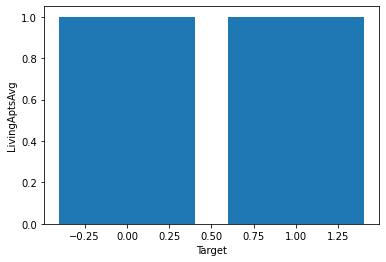

In [24]:
plt.bar(df2["TARGET"],df2["LIVINGAPARTMENTS_AVG"])
plt.xlabel('Target')
plt.ylabel('LivingAptsAvg')

In [25]:
#df2.plot.bar()

<AxesSubplot:>

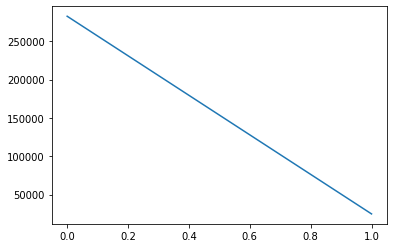

In [26]:
df2['TARGET'].value_counts().plot()

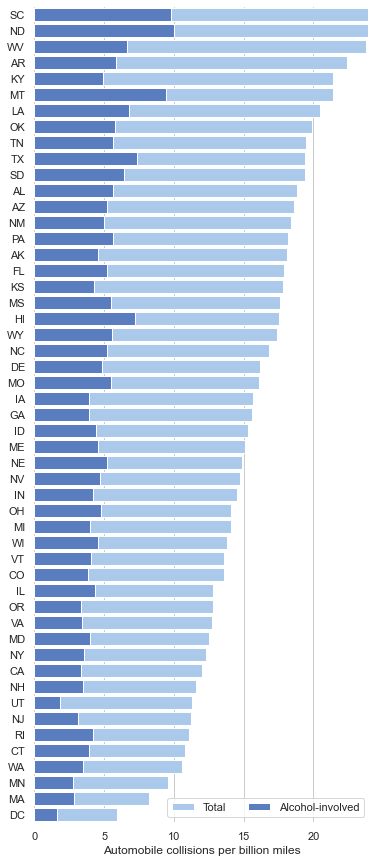

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)